# Title

**Exercise 2 [Not Graded!] - A Walkthrough Example**

# Description

The aim of this exercise is to let you do some analysis on your own with less structure.

# Dataset Description:
The dataset used here is the Wine data set (another commonly used sklearn dataset).  Use this to answer the questions embedded in the Notebook.

# Instructions:
1. Read the data.  
2. Do some explorations.
3. Fit some multiclass models.
4. Interpret these models.

# Hints:

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html" target="_blank">sklearn.LogisticRegression()</a> : Generates a Logistic Regression classifier

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.fit" target="_blank">sklearn.fit()</a> : Fits the model to the given data

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.predict" target="_blank">sklearn.predict()</a> : Predict using the estimated model (Logistic or knn classifiers) to perform pure classification predictions

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.predict_proba" target="_blank">sklearn.predict_proba()</a> : Predict using the estimated model (Logistic or knn classifiers) to perform probability predictions of all the classes in the response (they should add up to 1 for each observation)

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html" target="_blank">sklearn.LogisticRegression.coef_ and .intercept_</a> : Pull off the estimated β coefficients in a Logistic Regression model

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html" target="_blank">sklearn.KNeighborsClassifier</a> : Fit a k-NN classification model

Note: This exercise is NOT auto-graded.

In [38]:
%matplotlib inline
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier 
#import sklearn.metrics as met

from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

from sklearn.metrics import f1_score

First Read in the data set and take a peak at it:

In [2]:
raw = datasets.load_wine()
X_full = pd.DataFrame(raw['data'],columns=raw['feature_names'])
y = raw['target']
print(X_full.shape,y.shape)

(178, 13) (178,)


In [3]:
X_full.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


**Q1**: Perform a 70-30 `train_test_split` using `random_state=109` and `shuffle=True`.  Why is it important to shuffle here?

In [7]:
### your code here
x_train, x_test, y_train, y_test = train_test_split(X_full, y, test_size=0.3, shuffle=True)


**Setting *shuffle=True* helps ensure that the distribution of classes or patterns is similar in both the training and testing sets, providing a more representative and unbiased evaluation of the model's performance.**

**Q2**: Explore the data a little.  Visualize the marginal association (aka, bivariate relationship) of wine type to amount of alcohol, level of malic acid, and total level of phenols.  Which predictor seems to have the strongest association with the response?



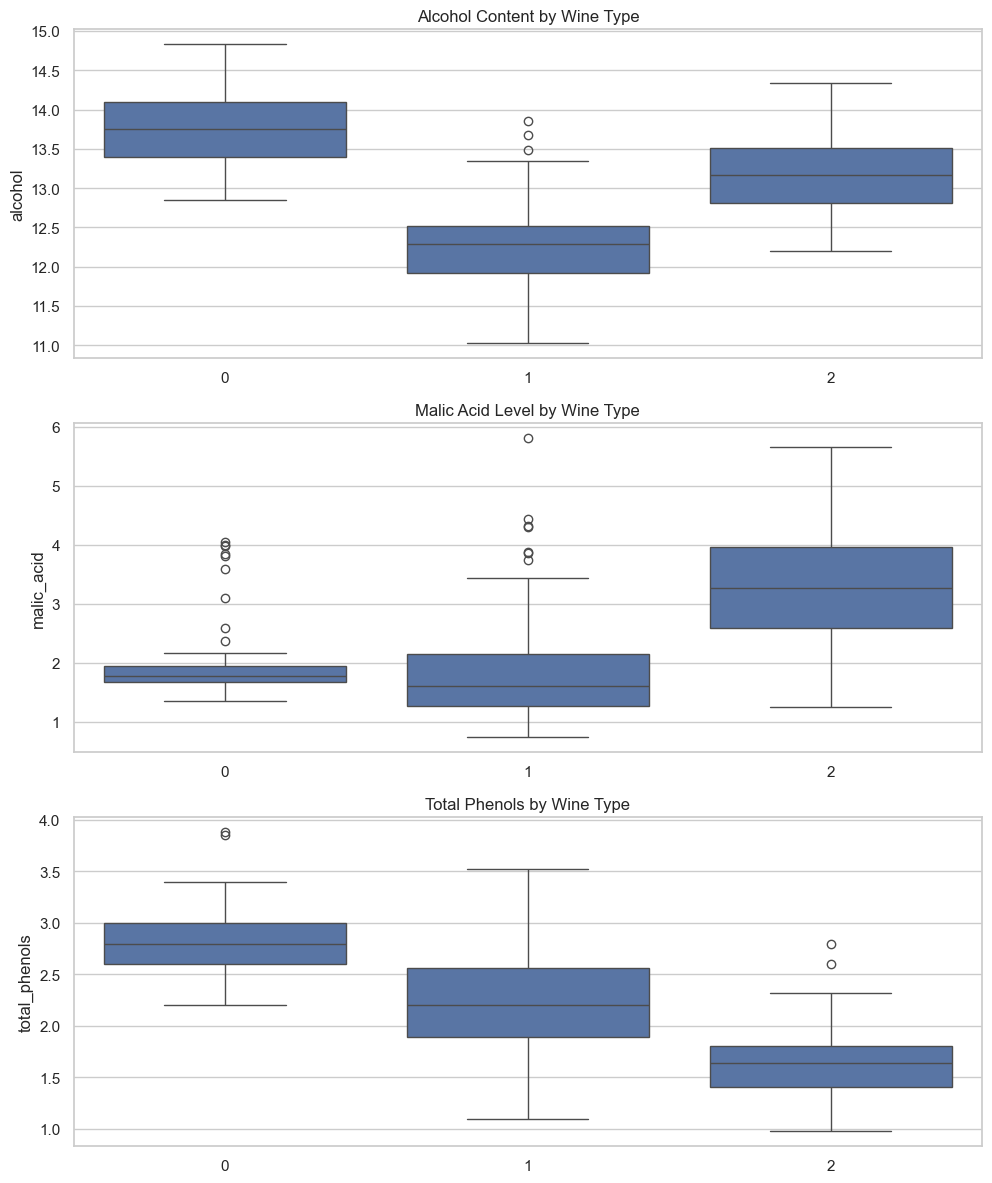

In [15]:
# Set the style for the plots
sns.set(style="whitegrid")

# Create subplots for each variable
fig, axes = plt.subplots(3, 1, figsize=(10, 12))

# Plot 1: Alcohol vs Wine Type
sns.boxplot(x=y, y=X_full['alcohol'], ax=axes[0])
axes[0].set_title("Alcohol Content by Wine Type")

# Plot 2: Malic Acid vs Wine Type
sns.boxplot(x=y, y=X_full['malic_acid'], ax=axes[1])
axes[1].set_title("Malic Acid Level by Wine Type")

# Plot 3: Total Phenols vs Wine Type
sns.boxplot(x=y, y=X_full['total_phenols'], ax=axes[2])
axes[2].set_title("Total Phenols by Wine Type")

# Adjust layout to prevent overlapping titles
plt.tight_layout()

# Show the plots
plt.show()





**Q3**: Fit 3 different models with ['alcohol','malic_acid'] as the predictors: (1) a standard logistic regression to predict a binary indicator for class 0 (you'll have to create it yourself), (2) a multinomial logistic regression to predict all 3 classes and (3) a OvR logistic reression to predict all 3 classes.  Compare the results

In [43]:
###your code here

# Force the response into a binary indicator for wine class 0:
y_is_0_test = 1 * (y_test==0)
y_is_0_train = 1 * (y_train==0)

#print(y_is_0_train.shape)
#print(x_train.shape)

#####################
# Standard logistic regression
log_reg = LogisticRegression()

#Fit the model on the train data
log_reg.fit(x_train[['alcohol', 'malic_acid']], y_is_0_train)

# Predict the response variable for the test set using the trained model
y_pred_log_reg = log_reg.predict(x_test[['alcohol', 'malic_acid']])

score_log_reg = log_reg.score(x_test[['alcohol', 'malic_acid']], y_is_0_test)

# Calculate F1-score for Logistic Regression
f1_log_reg = f1_score(y_pred_log_reg, y_is_0_test)

#Interpretation of F1-score:
#F1-score is the harmonic mean of precision and recall.
#It ranges from 0 to 1, where 1 indicates perfect precision and recall, and 0 indicates poor performance.
#Higher F1-score implies a better balance between precision and recall.
#A weighted average is used when there is class imbalance.

print(f"LOGISTIC REGRESSION SCORE {score_log_reg}, f1: {f1_log_reg}")


#######################
# Multinomial logistic regression for all three classes
log_multi = LogisticRegression(multi_class='multinomial', max_iter=5000).fit(
    x_train[['alcohol', 'malic_acid']], y_train)

score_log_multi = log_multi.score(
    x_test[['alcohol', 'malic_acid']], y_test)

# f1 score
y_pred_log_multi = log_multi.predict(x_test[['alcohol', 'malic_acid']])
f1_log_multi = f1_score(y_pred_log_multi, y_test, average='weighted') #for multi and ovr you need to specify average = average='weighted'


print(f"MULTINOMIAL LOG REG {score_log_multi}, f1: {f1_log_multi}")



#######################
# OvR logistic regression - 3 classes
log_ovr = LogisticRegression(penalty='none', multi_class='ovr',max_iter = 1000).fit(
    x_train[['alcohol', 'malic_acid']], y_train)

score_log_ovr = log_ovr.score(
    x_test[['alcohol', 'malic_acid']], y_test)

# f1 score
y_pred_log_ovr = log_ovr.predict(x_test[['alcohol', 'malic_acid']])
f1_log_ovr = f1_score(y_pred_log_ovr,y_test, average='weighted')

print(f"OvR REGRESSION SCORE {score_log_ovr}, f1: {f1_log_ovr}")




LOGISTIC REGRESSION SCORE 0.8148148148148148, f1: 0.6875
MULTINOMIAL LOG REG 0.7592592592592593, f1: 0.7612867382982325
OvR REGRESSION SCORE 0.7592592592592593, f1: 0.7599555806363255


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


*your answer here*

**Logistic Regression:**
Accuracy: 81.48%
F1-score: 0.6875
The F1-score is a measure of a model's ability to balance precision and recall. A score of 0.6875 is reasonable.

**Multinomial Logistic Regression:**
Accuracy: 75.93%
F1-score: 0.7613
The higher F1-score suggests that the Multinomial Logistic Regression model is performing well in terms of precision and recall.

**OvR Logistic Regression:**
Accuracy: 75.93%
F1-score: 0.75996
Similar to the Multinomial case, the OvR Logistic Regression model shows a good balance between precision and recall.

**Q4**: For the Multinomial model, use the estimated coefficients to calculate the predicted probabilties by hand.  Feel free to confirm with the `predict_proba` command.

In [81]:
### your code here

##################################################################################
# Manually calculate predicted probabilities
# Step 01: Extract coefs and intercept
coefs = log_multi.coef_ #matrix n, m where n=classes, m=predictors
intercept = log_multi.intercept_

# Print shapes for debugging
print("Coefs Shape:", coefs.shape)
print("Intercept Shape:", intercept.shape)

# Step 2: Create Design Matrix
design_matrix = np.column_stack((np.ones(len(x_test[['alcohol', 'malic_acid']])), x_test[['alcohol', 'malic_acid']].values))

# Print the design matrix for debugging
print("\nDesign Matrix:")
print(design_matrix.shape)

#logit = []

#for i in range(design_matrix.shape[0]):
#    for j in range (coefs.shape[0]):
#        print(i)
#        logit_i = intercept[i] + coefs[i, 0] * x_test[['alcohol']].iloc[i] + coefs[i, 1] * x_test[['malic_acid']].iloc[i]

#        logit.append(logit_i)

# Step 3: Calculate Logits
#logits = np.dot(design_matrix, np.hstack([intercept[:, np.newaxis], coefs.T]))

# Print shapes for debugging
#print("\nShapes for Dot Product:")
#print("Design Matrix Shape:", design_matrix.shape)
#print("Concatenated Coefs Shape:", np.hstack([intercept[:, np.newaxis], coefs.T]).shape)

# Print logits for debugging
#print("\nLogits:")
#print(logits)

# Step 4: Apply Logistic Function
#probs_manual = 1 / (1 + np.exp(-logits))



##################################################################################
# Use predict_proba method
probs_predict_proba_multi = log_multi.predict_proba(x_test[['alcohol', 'malic_acid']])

# Compare the results
#print("Manual Calculations:", probs_manual)

print(log_multi.predict(x_test[['alcohol', 'malic_acid']])[1:10])
print("predict_proba Method:", probs_predict_proba_multi[1:10])



SyntaxError: expected ':' (1525515485.py, line 23)

*your answer here*

**Q5**: For the OvR model, use the `predict_proba()` to estimate the predicted probabilities in the test set, and manually use this to calculate the predicted classes.  Feel free to confirm with the `predict` command.

In [72]:
### your code here

##################################################################################
# Use predict_proba method
probs_predict_proba_ovr = log_ovr.predict_proba(x_test[['alcohol', 'malic_acid']])

# Compare the results
#print("Manual Calculations:", probs_manual)

print("Classes prediction:", log_ovr.predict(x_test[['alcohol', 'malic_acid']])[1:10])
print("predict_proba Method:", probs_predict_proba_ovr[1:10])


Classes prediction: [2 0 0 1 0 1 1 0 0]
predict_proba Method: [[1.16478906e-01 2.76480591e-01 6.07040503e-01]
 [8.08022613e-01 4.33232396e-02 1.48654147e-01]
 [8.66363118e-01 1.92006378e-02 1.14436244e-01]
 [6.91782136e-04 5.16350561e-01 4.82957656e-01]
 [5.70478923e-01 2.49683775e-01 1.79837302e-01]
 [4.01760246e-01 4.43685842e-01 1.54553912e-01]
 [9.35604217e-03 6.34210381e-01 3.56433577e-01]
 [8.13285659e-01 1.43703194e-03 1.85277309e-01]
 [4.48874078e-01 1.60068399e-01 3.91057523e-01]]


**Q6**: How could you use the `predict_proba()` command and 'change the threshold' in the multiclass setting to affect predictive accuracies within each class?  Note: it is not as simple as changing a threshold because there is not threshold

*your answer here*

**Q7**: Compare the accuracies in both train and test for both the multinomial and OvR logistic regressions.  Which seems to be performing better?  Is there any evidence of overfitting?  How could this be corrected?

In [ ]:
### your code here

*your answer here*

**Q8**: Create the classification boundaries for the two multiclass logistic regression models above.  How do they compare?

In [ ]:
###your code here



*your answer here*

**Q9**: Fit 3 different knn regression models: for $k = 3, 10, 30$. Visualize the classification boundaries for these 3 models and compare the results.  Which seem to be overfit?

In [ ]:
### your answer here

In [ ]:
### your answer here

*your answer here*

**Q10** How could you visualize the classification boundary for any of these models if there was a single predictor?  What if there were more than 2 predictors?

*your answer here*